In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

from pandas import set_option
pd.options.mode.chained_assignment = None

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from scipy.stats import truncnorm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [3]:
def ML_train(X_tr, y_tr, X_te, y_te):
    rstate = random.randrange(1,999999999,1)
    estimator = RandomForestRegressor(random_state = rstate, n_estimators = 10, n_jobs = 12)
    train = estimator.fit(X_tr, y_tr)
    pred = estimator.predict(X_te)
    
    # Cross validation 
    cvscore = cross_val_score(estimator, X_tr, y_tr, cv=5)
    score = cvscore.mean()
    print("Score with the entire dataset = %.2f" % score)
    
    print(mean_absolute_error(y_te, pred))
    print(mean_squared_error(y_te,pred))
    print(r2_score(y_te, pred))

In [4]:
charge_csv = pd.read_csv("cal.iRESP_good.dat", header=None, sep=' ')
names = np.asarray(charge_csv[0])
y = np.asarray(charge_csv[2])

In [5]:
import glob
from ase.io import read
cutoff = 2.7 # cutoff distance for constructing the CM.

loops = glob.glob("structures/*.pdb")
structures = list()
for loop in loops:
    name = loop.split('/')[1].split('.pdb')[0]
    if name in names:
        structure = read(loop)
        #hvy_atoms = structure[structure.get_atomic_numbers()>1]
        #structures.append(structure)
        i=structure.get_global_number_of_atoms()
        cutAtoms = structure[structure.get_distances(1,range(i))<cutoff & structure.get_atomic_numbers() > 1]
        structures.append(cutAtoms)

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [48]:
j = list()
for i in structures:
    j.append(i.get_global_number_of_atoms())
n_max=sorted(j)[-1]

In [49]:
from dscribe.descriptors import CoulombMatrix
cm = CoulombMatrix(n_atoms_max=n_max)
X = cm.create(structures)

In [50]:
print(X.shape, y.shape)

(7817, 144) (7817,)


In [51]:
from sklearn.ensemble import RandomForestRegressor
testsize = 0.3
rstate = random.randrange(1,999999999,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = testsize, random_state = rstate)

In [52]:
X_train_total_size = X_train.shape[0]
chunk = 3
chunk_size = int(X_train_total_size / chunk)
for i in range(chunk):
    row = 1 + i*chunk_size + chunk_size
    sub_X_train = X_train[0:row,:]
    sub_y_train = y_train[0:row]
    ML_train(sub_X_train,sub_y_train,X_test,y_test)

Score with the entire dataset = -0.18
0.09217561477489547
0.018585624034839463
-0.19540400815439618
Score with the entire dataset = -0.17
0.09099760502679334
0.018024715235310598
-0.15932705825435667
Score with the entire dataset = -0.16
0.09013076914098973
0.01804194699383325
-0.16043538333221852


In [53]:
rstate = random.randrange(1,999999999,1)
estimator = RandomForestRegressor(random_state = rstate, n_estimators = 10, n_jobs = 12)
train = estimator.fit(X_train, y_train)
pred = estimator.predict(X_test)

In [54]:
# Cross validation 
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(estimator, X_train, y_train, cv=5)
score = cvscore.mean()
print("Score with the entire dataset = %.2f" % score)

Score with the entire dataset = -0.16


In [55]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test,pred))
print(r2_score(y_test, pred))

0.09146989832068093
0.01847270766907623
-0.18814136924775693


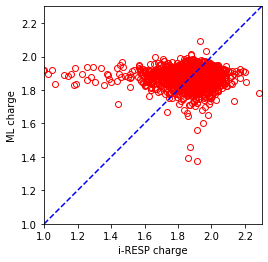

In [56]:
# Plot outputs
import pylab as pl
fig = pl.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
pl.plot(y_test, pred,'ro',fillstyle='none')
pl.xlim(1,2.3)
pl.ylim(1,2.3)
pl.plot([1,3],[1,3], '--b')
pl.xlabel('i-RESP charge')
pl.ylabel('ML charge')
pl.show()

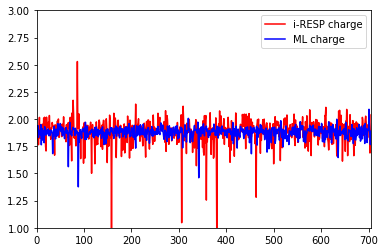

In [57]:
data_size = len(y_test)
fig = pl.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0, int(data_size*testsize +3))
ax.set_ylim(1, 3)
pl.plot(y_test, color='red', label = 'i-RESP charge')
pl.plot(pred, color='blue', label = 'ML charge')
pl.legend(loc='best')
pl.show()

In [ ]:
data_size = len(y_train)
fig = pl.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0, int(data_size))
ax.set_ylim(1, 3)
pl.plot(y_train, color='red', label = 'i-RESP charge')
pl.plot(estimator.predict(X_train), color='blue', label = 'ML charge')
pl.legend(loc='best')
pl.show()